# **Spherical Cluster Comparison**

## **Importing the libraries**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')    # To get rid of warning messages

from sklearn import datasets         # To create dummy dataset
from sklearn.cluster import KMeans   
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style='darkgrid')

## **Creating the dummy dataset**

In [2]:
np.random.seed(1)   # Setting the seed to get reproducible results
conc_circles = datasets.make_circles(n_samples = 2000, factor = .5, noise = .05)
conc_circles

(array([[-0.54830966, -0.90374793],
        [-0.19302605, -0.41799164],
        [-0.13091758,  0.54245826],
        ...,
        [ 0.59159525, -0.27592012],
        [ 0.18250222,  1.01607463],
        [ 0.49486911,  0.18753244]]),
 array([0, 1, 1, ..., 1, 0, 1], dtype=int64))

In [3]:
X, y = conc_circles         # Separating the features and the labels

In [4]:
df = pd.DataFrame(X)
df.columns = ['X1', 'X2']
df['Y'] = y
df

,X1,X2,Y
0,-0.55,-0.90,0
1,-0.19,-0.42,1
2,-0.13,0.54,1
3,-0.18,0.45,1
4,0.13,0.51,1
...,...,...,...
1995,0.13,-0.51,1
1996,0.49,0.33,1
1997,0.59,-0.28,1
1998,0.18,1.02,0


## **Visualizing the data**

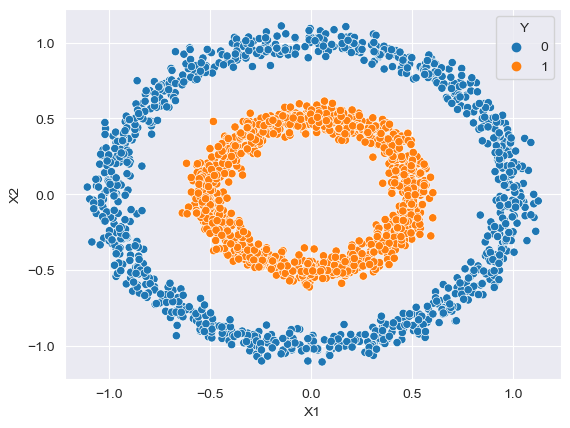

In [5]:
# Scatter plot of original lables
sns.scatterplot(x='X1', y='X2', data=df, hue='Y')
plt.show()

The above scatter plot shows **two concentric circles, each belonging to a different class**. The **objective is to visualize the clusters we get from different clustering algorithms by using the features X1 and X2,** and see how well each clustering algorithm can perform in terms of identifying the underlying pattern of concentric circles.

## **Scaling the data**

In [6]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit_transform(X)

## **K-Means**

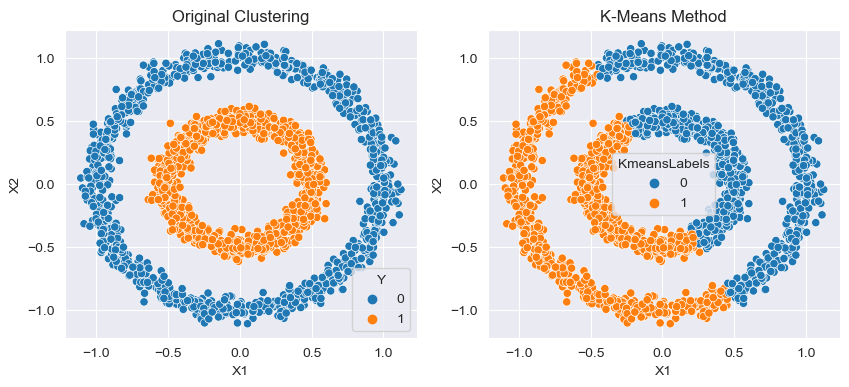

In [7]:
kmeans = KMeans(n_clusters = 2, random_state = 12, n_init='auto')
kmeans.fit(X_scale)
df['KmeansLabels'] = kmeans.predict(X_scale)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.scatterplot(x='X1', y='X2', data=df, hue='Y', ax=axis[0])
axis[0].set_title('Original Clustering')

sns.scatterplot(x ='X1', y='X2', data=df, hue='KmeansLabels', ax=axis[1])
axis[1].set_title('K-Means Method')
plt.show()

### **Comments**

- The K-means clustering algorithm is not able to identify the original clusters in the data.

## **K-Medoids**

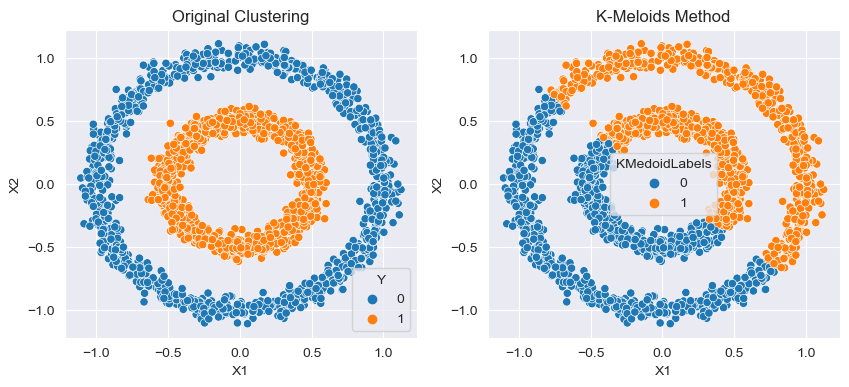

In [8]:
kmedo = KMedoids(n_clusters=2, random_state = 12)
kmedo.fit(X_scale)
df['KMedoidLabels'] = kmedo.predict(X_scale)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.scatterplot(x='X1', y='X2', data=df, hue='Y', ax=axis[0])
axis[0].set_title('Original Clustering')

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'KMedoidLabels', ax=axis[1])
axis[1].set_title('K-Meloids Method')
plt.show()

### **Comments**
 - We see similar results as K-Means for K-Medoids.

## **Gaussian Mixture Model**

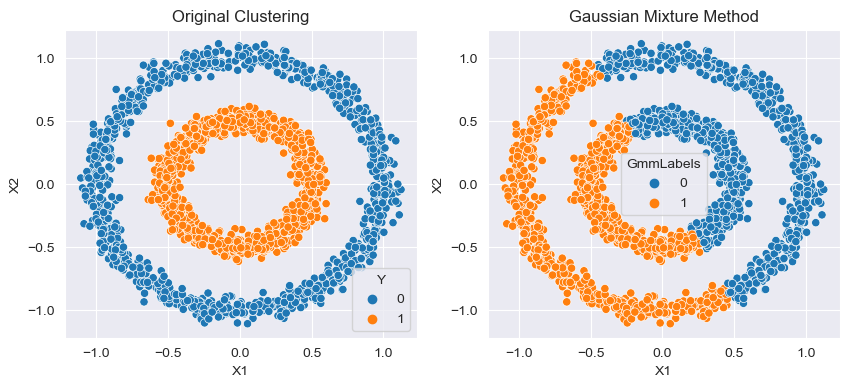

In [9]:
gmm = GaussianMixture(n_components = 2, random_state = 12)
gmm.fit(X_scale) 
df['GmmLabels'] = gmm.predict(X_scale)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.scatterplot(x='X1', y='X2', data=df, hue='Y', ax=axis[0])
axis[0].set_title('Original Clustering')

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'GmmLabels', ax=axis[1])
axis[1].set_title('Gaussian Mixture Method')
plt.show()

### **Comments**
- Gaussian Mixture Model is also not able to identify the underlying concentric circles in the data.

## **Hierarchical - Agglomerative**

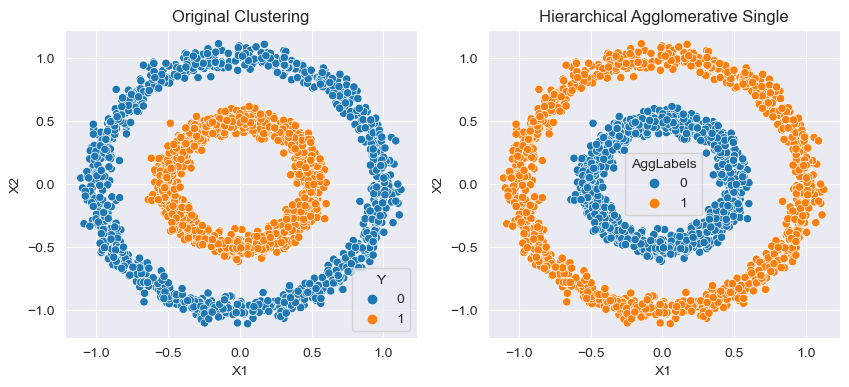

In [10]:
aglc = AgglomerativeClustering(n_clusters = 2, linkage = 'single')
df['AggLabels'] = aglc.fit_predict(X_scale)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.scatterplot(x='X1', y='X2', data=df, hue='Y', ax=axis[0])
axis[0].set_title('Original Clustering')

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'AggLabels', ax=axis[1])
axis[1].set_title('Hierarchical Agglomerative Single')
plt.show()

### **Comments**

 - Except for the opposite labeling of clusters, Agglomerative Clustering, with default hyperparameters and 2 as the number of clusters, has been able to identify the desired clusters.

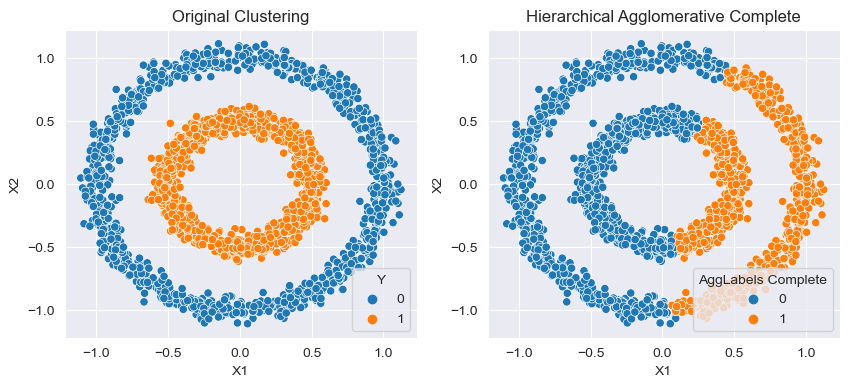

In [11]:
aglc = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')
df['AggLabels Complete'] = aglc.fit_predict(X_scale)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.scatterplot(x='X1', y='X2', data=df, hue='Y', ax=axis[0])
axis[0].set_title('Original Clustering')

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'AggLabels Complete', ax=axis[1])
axis[1].set_title('Hierarchical Agglomerative Complete')
plt.show()

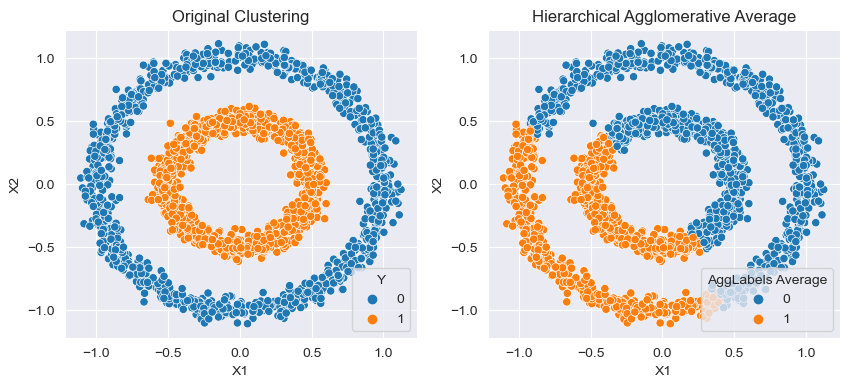

In [12]:
aglc = AgglomerativeClustering(n_clusters = 2, linkage = 'average')
df['AggLabels Average'] = aglc.fit_predict(X_scale)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.scatterplot(x='X1', y='X2', data=df, hue='Y', ax=axis[0])
axis[0].set_title('Original Clustering')

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'AggLabels Average', ax=axis[1])
axis[1].set_title('Hierarchical Agglomerative Average')
plt.show()

## **DBSCAN**

- Now let us look at the DBSCAN algorithm

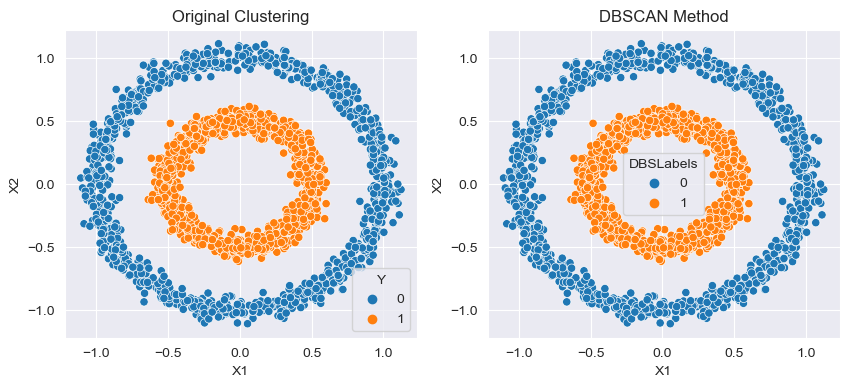

In [13]:
dbs = DBSCAN(eps = 0.3)
df['DBSLabels'] = dbs.fit_predict(X_scale)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.scatterplot(x='X1', y='X2', data=df, hue='Y', ax=axis[0])
axis[0].set_title('Original Clustering')

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'DBSLabels', ax=axis[1])
axis[1].set_title('DBSCAN Method')
plt.show()

### **Comments**

- DBSCAN has correctly identified the intended clusters in the dataset.
- Note that, based on the value of the hyperparameter eps, the results might vary for the DBSCAN algorithm. For a too large value, there might be just one cluster that is identified by the algorithm (try with values 0.7, 1).

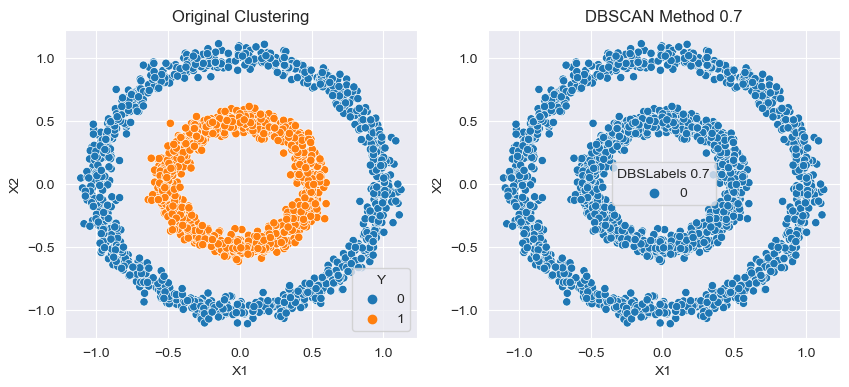

In [14]:
dbs = DBSCAN(eps = 0.7)
df['DBSLabels 0.7'] = dbs.fit_predict(X_scale)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.scatterplot(x='X1', y='X2', data=df, hue='Y', ax=axis[0])
axis[0].set_title('Original Clustering')

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'DBSLabels 0.7', ax=axis[1])
axis[1].set_title('DBSCAN Method 0.7')
plt.show()

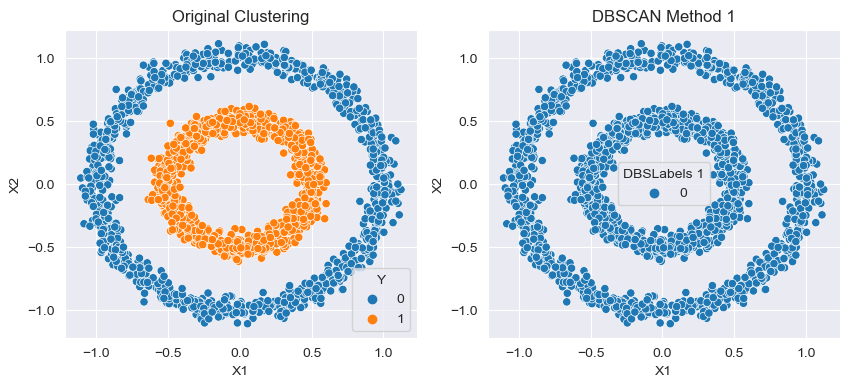

In [15]:
dbs = DBSCAN(eps = 1)
df['DBSLabels 1'] = dbs.fit_predict(X_scale)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.scatterplot(x='X1', y='X2', data=df, hue='Y', ax=axis[0])
axis[0].set_title('Original Clustering')

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'DBSLabels 1', ax=axis[1])
axis[1].set_title('DBSCAN Method 1')
plt.show()

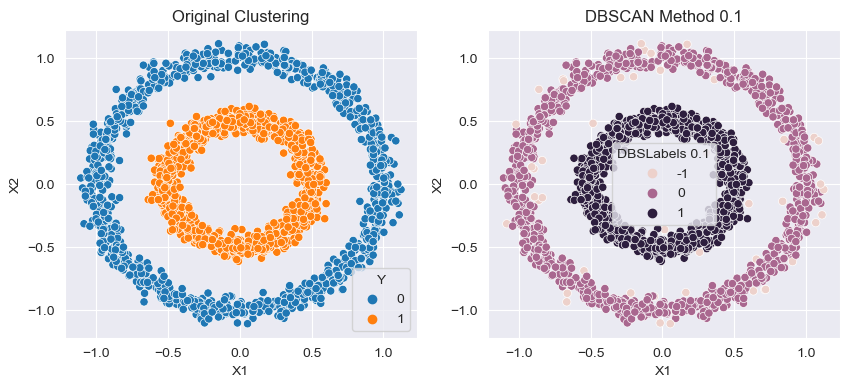

In [16]:
dbs = DBSCAN(eps = 0.1)
df['DBSLabels 0.1'] = dbs.fit_predict(X_scale)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.scatterplot(x='X1', y='X2', data=df, hue='Y', ax=axis[0])
axis[0].set_title('Original Clustering')

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'DBSLabels 0.1', ax=axis[1])
axis[1].set_title('DBSCAN Method 0.1')
plt.show()

## **Further Recommendations**

- You can visit <a href = 'https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html'>here</a> to better understand the behavior of these algorithms on other types of toy datasets. You are recommended to try out other sample datasets used in the example above by referring to the code in this notebook.
- A snippet of algorithms' performance on different toy datasets has been added below.

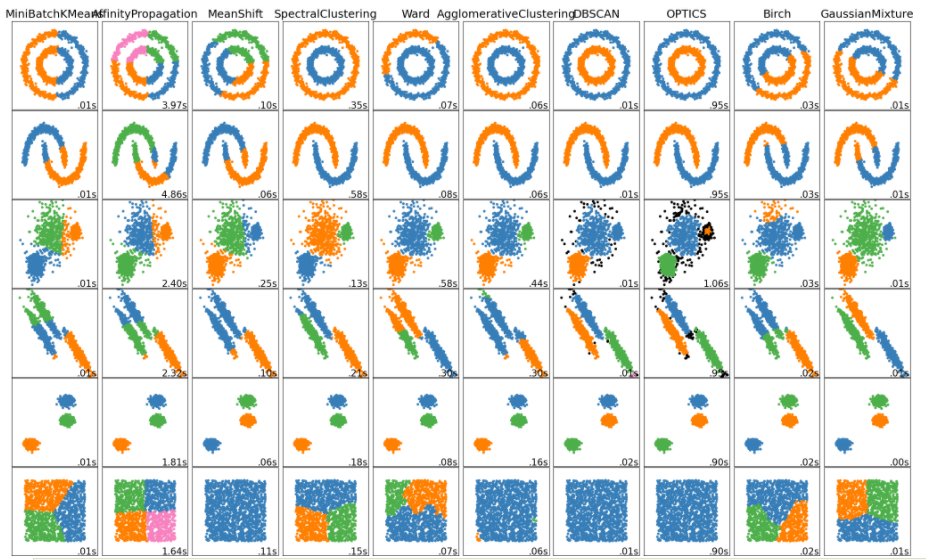
